# M1_Tomorrow_price-model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data =pd.read_csv("Crypto_data2.csv")

In [4]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Crypto
0,0,2014-12-09,361.894989,363.066986,344.950989,352.218994,352.218994,32915500,BTC
1,1,2014-12-10,352.204987,352.384003,346.364990,346.364990,346.364990,16427700,BTC
2,2,2014-12-11,344.339996,361.356995,338.763000,350.506012,350.506012,32431300,BTC
3,3,2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800,BTC
4,4,2014-12-13,352.381012,352.381012,346.588013,347.376007,347.376007,11675900,BTC
...,...,...,...,...,...,...,...,...,...
10129,1570,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,1913.793213,65771052,MKR
10130,1571,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,1773.745972,62791406,MKR
10131,1572,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,1750.467651,56816724,MKR
10132,1573,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,1744.610962,36075999,MKR


In [5]:
data.isnull().any()

Unnamed: 0    False
Date          False
Open          False
High          False
Low           False
Close         False
Adj Close     False
Volume        False
Crypto        False
dtype: bool

In [6]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Crypto        0
dtype: int64

In [7]:
data.dropna(inplace =True)

In [8]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Crypto        0
dtype: int64

In [9]:
data.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'Crypto'],
      dtype='object')

In [10]:
data.drop(['Unnamed: 0', 'Adj Close','Volume' ],axis =1, inplace =True)
data

,Date,Open,High,Low,Close,Crypto
0,2014-12-09,361.894989,363.066986,344.950989,352.218994,BTC
1,2014-12-10,352.204987,352.384003,346.364990,346.364990,BTC
2,2014-12-11,344.339996,361.356995,338.763000,350.506012,BTC
3,2014-12-12,350.833008,352.983002,349.290985,352.541992,BTC
4,2014-12-13,352.381012,352.381012,346.588013,347.376007,BTC
...,...,...,...,...,...,...
10129,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,MKR
10130,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,MKR
10131,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,MKR
10132,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,MKR


# Make  target value in USD

In [11]:
#data["Today_USD"] =  (data["Open"] + data["Close"] ) /2
data["Today_USD"] =  (data["Open"])


In [12]:
mkr = data[data["Crypto"] == "MKR"]

In [13]:
mkr["Tomorrowopen"] = mkr["Open"].shift(-1)

In [14]:
mkr.tail()

,Date,Open,High,Low,Close,Crypto,Today_USD,Tomorrowopen
10129,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,MKR,1754.225098,1912.570557
10130,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,MKR,1912.570557,1773.831665
10131,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,MKR,1773.831665,1750.544189
10132,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,MKR,1750.544189,1739.929932
10133,2022-03-13,1739.929932,1780.157715,1695.159424,1727.445068,MKR,1739.929932,NaN


In [15]:
mkr

,Date,Open,High,Low,Close,Crypto,Today_USD,Tomorrowopen
8559,2017-11-20,252.481995,278.230988,252.401993,272.449005,MKR,252.481995,272.019989
8560,2017-11-21,272.019989,288.925995,260.019012,279.920013,MKR,272.019989,280.277008
8561,2017-11-22,280.277008,400.648987,280.050995,326.191986,MKR,280.277008,326.941986
8562,2017-11-23,326.941986,359.498993,320.864990,347.436005,MKR,326.941986,345.696991
8563,2017-11-24,345.696991,408.135010,339.252991,401.825012,MKR,345.696991,401.759003
...,...,...,...,...,...,...,...,...
10129,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,MKR,1754.225098,1912.570557
10130,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,MKR,1912.570557,1773.831665
10131,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,MKR,1773.831665,1750.544189
10132,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,MKR,1750.544189,1739.929932


In [16]:
data[data["Crypto"] == 'MKR']

,Date,Open,High,Low,Close,Crypto,Today_USD
8559,2017-11-20,252.481995,278.230988,252.401993,272.449005,MKR,252.481995
8560,2017-11-21,272.019989,288.925995,260.019012,279.920013,MKR,272.019989
8561,2017-11-22,280.277008,400.648987,280.050995,326.191986,MKR,280.277008
8562,2017-11-23,326.941986,359.498993,320.864990,347.436005,MKR,326.941986
8563,2017-11-24,345.696991,408.135010,339.252991,401.825012,MKR,345.696991
...,...,...,...,...,...,...,...
10129,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,MKR,1754.225098
10130,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,MKR,1912.570557
10131,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,MKR,1773.831665
10132,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,MKR,1750.544189


In [17]:
data["Crypto"].unique()

array(['BTC', 'LTC', 'BNB', 'ETH', 'MKR'], dtype=object)

In [18]:
# making tomorrow result 
for id, crip in enumerate(data["Crypto"].unique()):
    ind_cript = data[data["Crypto"] == crip]
    ind_cript["Tomorrow_price(USD)"] =ind_cript["Today_USD"].shift(-1) 
    ind_cript.head()
    ind_cript.dropna(inplace =True)
    if (id ==0 ):
        BTC =ind_cript
    elif (id ==1 ):
        ADA = ind_cript
    elif (id == 2 ):
        BNB = ind_cript
    elif (id == 3 ):
        ETH = ind_cript
    elif (id == 4 ):
        USDT = ind_cript
        

file = pd.concat([BTC,ETH, BNB, ADA, USDT])
#files = pd.concat([BTC,ETH, BNB])

In [19]:
file.tail()

,Date,Open,High,Low,Close,Crypto,Today_USD,Tomorrow_price(USD)
10128,2022-03-08,1745.794800,1790.965698,1722.096802,1754.612671,MKR,1745.794800,1754.225098
10129,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,MKR,1754.225098,1912.570557
10130,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,MKR,1912.570557,1773.831665
10131,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,MKR,1773.831665,1750.544189
10132,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,MKR,1750.544189,1739.929932


In [20]:
for x, y in enumerate(data["Crypto"].unique()):
    file["Crypto"] = file["Crypto"].replace({y:  x})
    print("The Crypto ", y, " is =", x)
    

The Crypto  BTC  is = 0
The Crypto  LTC  is = 1
The Crypto  BNB  is = 2
The Crypto  ETH  is = 3
The Crypto  MKR  is = 4


In [21]:
file["Crypto"].unique()

array([0, 3, 2, 1, 4], dtype=int64)

In [22]:
file.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Crypto', 'Today_USD',
       'Tomorrow_price(USD)'],
      dtype='object')

In [23]:
file.drop(["Date","Today_USD"], inplace =True, axis =True)

# Scaling

In [24]:
file.head()

,Open,High,Low,Close,Crypto,Tomorrow_price(USD)
0,361.894989,363.066986,344.950989,352.218994,0,352.204987
1,352.204987,352.384003,346.364990,346.364990,0,344.339996
2,344.339996,361.356995,338.763000,350.506012,0,350.833008
3,350.833008,352.983002,349.290985,352.541992,0,352.381012
4,352.381012,352.381012,346.588013,347.376007,0,346.726990


In [25]:
from sklearn.model_selection import train_test_split

X = file.iloc[:,:-1]
Y = file.iloc[:,-1]

In [26]:
#X.to_csv("Crypto_input.csv")

In [27]:
from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X)
X_sc = scaler_x.transform(X)
Y_sc = scaler_y.fit(file[["Tomorrow_price(USD)"]])
Y_sc =scaler_y.fit_transform(file[["Tomorrow_price(USD)"]])
X_sc,Y_sc


(array([[0.00534048, 0.00525849, 0.00517976, 0.00519586, 0.        ],
        [0.00519703, 0.00510318, 0.00520106, 0.00510922, 0.        ],
        [0.00508059, 0.00523363, 0.00508654, 0.00517051, 0.        ],
        ...,
        [0.02829693, 0.02781098, 0.0265798 , 0.02623505, 1.        ],
        [0.02624301, 0.02604842, 0.02574164, 0.02589052, 1.        ],
        [0.02589826, 0.0259832 , 0.02626461, 0.02580384, 1.        ]]),
 array([[0.00519703],
        [0.00508059],
        [0.00517672],
        ...,
        [0.02624301],
        [0.02589826],
        [0.02574113]]))

In [28]:
#X,Y

In [29]:
#scaler_x.inverse_transform(X_sc)
#scaler_y.inverse_transform(Y_sc)


In [30]:
X_train,X_test, Y_train, Y_test = train_test_split( X_sc, Y_sc,test_size = 0.2, random_state = 42)

# machine learning algarithams comparitions

In [31]:
#conda install -c conda-forge xgboost

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
#from xgboost import XGBRegressor
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor 
lr = LinearRegression()
svr =SVR()
sgdr = SGDRegressor()
ls = Lasso()
xgbr = XGBRegressor()
r = Ridge()
rfr = RandomForestRegressor()

alg = [lr, svr, sgdr, ls, xgbr, r,rfr]

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from math import sqrt

#rms = sqrt(mean_squared_error(y_actual, y_predicted))

In [34]:
Mae = []
Alg = []
Mse = []
Rms = []
for  x in alg:
    x.fit(X_train, Y_train)
    pred = x.predict(X_test)
    
# convert scaller to normal (inverse scalling)

    if len(pred.shape) ==1:
        p = (np.array([pred]).T)

        pr = scaler_y.inverse_transform(p)
        y_t = scaler_y.inverse_transform(Y_test)
        mse = mean_squared_error(y_t, pr)
        rms = np.sqrt(mse)
        mae = mean_absolute_error(y_t, pr)
        r2 = r2_score(y_t, pr)
    else:
        pr = scaler_y.inverse_transform(pred)
        y_t = scaler_y.inverse_transform(Y_test)
        mse = mean_squared_error(y_t, pr)
        rms = np.sqrt(mse)
        mae = mean_absolute_error(y_t, pr)
        r2 = r2_score(y_t, pr)
    Mae.append(mae)
    Alg.append(x)
    Mse.append(mse)
    Rms.append(rms)
    

    print(x,"\n mse = ",mse,";\n rms = ",rms,"\n mae = ", mae, "\n R2 = ",r2)
    print()




LinearRegression() 
 mse =  169.6051794100677 ;
 rms =  13.02325533075612 
 mae =  3.407315525480733 
 R2 =  0.9999980915293532

SVR() 
 mse =  32043572.35902993 ;
 rms =  5660.704228188391 
 mae =  5442.573518031421 
 R2 =  0.6394319001426716

SGDRegressor() 
 mse =  165539.0234157648 ;
 rms =  406.8648711989827 
 mae =  287.0502586864981 
 R2 =  0.9981372834945964

Lasso() 
 mse =  88921964.02494724 ;
 rms =  9429.844326654988 
 mae =  4856.872917291782 
 R2 =  -0.0005883003560214206

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
            

In [38]:
name = ["LogR", "svr", "sgdr", "lasso", 'xgbr', 'ridge','rfr']
Error = pd.DataFrame(np.array([name,Mae,Rms, Mse]).T,columns =["ALG","MAE","RMS","MSE"])
#b = pd.DataFrame(a, columns = )
Error

,ALG,MAE,RMS,MSE
0,LogR,3.407315525480733,13.02325533075612,169.6051794100677
1,svr,5442.573518031421,5660.704228188391,32043572.35902993
2,sgdr,287.0502586864981,406.8648711989827,165539.0234157648
3,lasso,4856.872917291782,9429.844326654988,88921964.02494724
4,xgbr,23.03480406073399,81.86438486755088,6701.777509742493
5,ridge,46.778941316141754,176.04362146860902,30991.356659782894
6,rfr,8.10375614481921,39.85733178773691,1588.6068972377434


<AxesSubplot:xlabel='count', ylabel='MAE'>

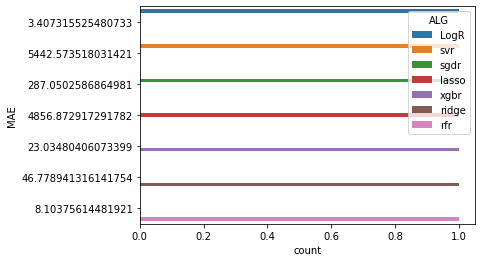

In [39]:
sns.countplot(data =Error , y ="MAE", hue = "ALG")
plt.show()

# Prediction Testiong

In [40]:

lr.fit(X_train, Y_train)
predictlr = lr.predict(X_test)
mse = mean_squared_error(Y_test, predictlr)
rms = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictlr)
r2 = r2_score(Y_test, predictlr)

print(x,"\n mse = ",mse,";  rms = ",rms," mse = ", mae, "R2 = ",r2)
print()
predictlr

RandomForestRegressor() 
 mse =  3.717120572121225e-08 ;  rms =  0.00019279835507911432  mse =  5.0442444063643796e-05 R2 =  0.9999980915293532



array([[0.00619157],
       [0.00657213],
       [0.11445793],
       ...,
       [0.00816055],
       [0.00506585],
       [0.00158383]])

actual value form testing dataset

In [41]:
yteat = scaler_y.inverse_transform(Y_test)
yteat[:10]

array([[ 418.731995],
       [ 446.062012],
       [7755.490234],
       [  61.302834],
       [  15.457432],
       [9145.985352],
       [  48.136169],
       [4863.930176],
       [6354.240234],
       [ 727.013   ]])

predicted value

In [42]:
yprediction = scaler_y.inverse_transform(predictlr)
yprediction[:10]

array([[ 419.38478749],
       [ 445.09113352],
       [7732.62406805],
       [  60.8044746 ],
       [  15.07394675],
       [9139.60897212],
       [  47.36631164],
       [4876.27557252],
       [6351.65724871],
       [ 727.9890008 ]])

# plot compariton  original vs predicted

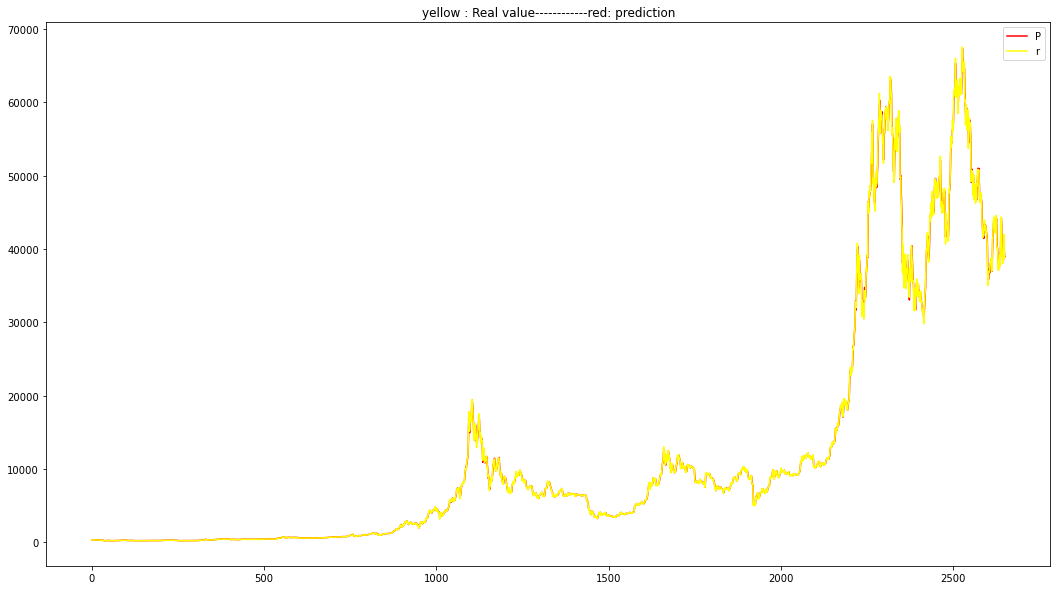

In [76]:
# taking all btc coins 
btc = file[file["Crypto"] ==0]
# split input output 
btc_x = btc.iloc[:,:-1]
btc_y = btc.iloc[:,-1]

# scallling 
scaler_x.fit(X)
btc_x_sc = scaler_x.transform(btc_x)
btc_y_sc =scaler_y.transform(btc[["Tomorrow_price(USD)"]])
btc_x_sc,btc_y_sc
# predictng
predictlr_btc = r.predict(btc_x_sc)
predictlr_btc
# inverse scaling
pred_btc = scaler_y.inverse_transform(predictlr_btc)
pred_btc
# plot comparition 
plt.figure(figsize = (18,10))
original_btc = btc["Tomorrow_price(USD)"]
plt.plot(pred_btc,color ="red")

plt.plot(original_btc,color ="yellow")
plt.legend("Predict")
plt.title("yellow : Real value------------red: prediction")
plt.show()

# best fit line and prediction

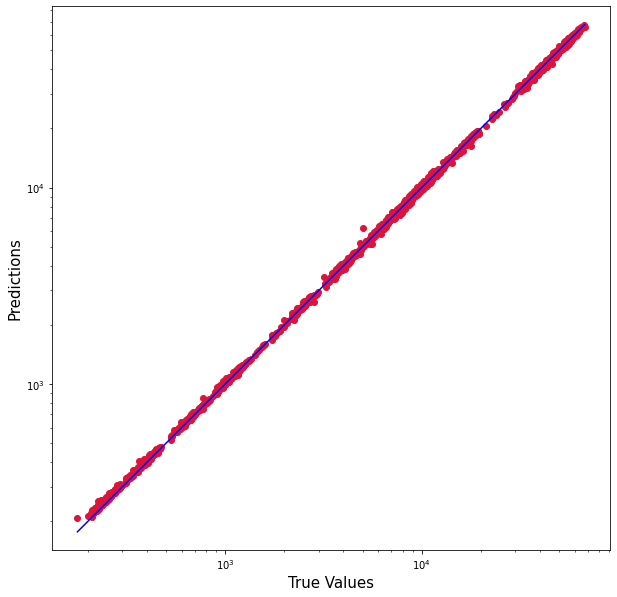

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(original_btc, pred_btc, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_btc), max(original_btc))
p2 = min(min(pred_btc), min(original_btc))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
import joblib
#joblib.dump(lr,"BTC(Open)_lr_sc.pkl")

In [ ]:
z= []
for x in (X.columns.unique()):
    print("Enter ",x, "value")
    a= input()
    z.append(a)

In [ ]:
# converting input in to alg 
A =np.array([z])
print("Our given input", A)

In [ ]:
# our input after scaling
test_input = scaler_x.transform(A)
test_input

In [ ]:
pred =lr.predict(test_input)
#b = scaler_y.transform(pred)
scaler_y.inverse_transform(pred)